In [39]:
%load_ext autoreload
%autoreload 2

# Pagel's lambda for growth rates
from src.ihmp import get_diffs, pagels_dataframe

# Global variables
GG_TREE = "./greengenes/data/gg_13_5_otus_99_annotated.tree"
TOP_N = 1000

names = ["ibd", "moms", "t2d"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# Distill into iHMP-agnostic function:
diffs = {name: get_diffs(name, top_n=TOP_N) for name in names}

In [26]:
# Compute lambda values for each iHMP dataset:

for name in names:
    pls, tree = pagels_dataframe(diffs[name], GG_TREE)
    pls.to_csv(f"./results/{name}_pls_top{TOP_N}.tsv", sep="\t")
    tree.write(format=1, outfile=f"./results/{name}_tree_top{TOP_N}.nwk")

  0%|          | 0/2149 [00:00<?, ?it/s]/home/phil/miniconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
100%|██████████| 2149/2149 [3:40:06<00:00,  6.15s/it]  


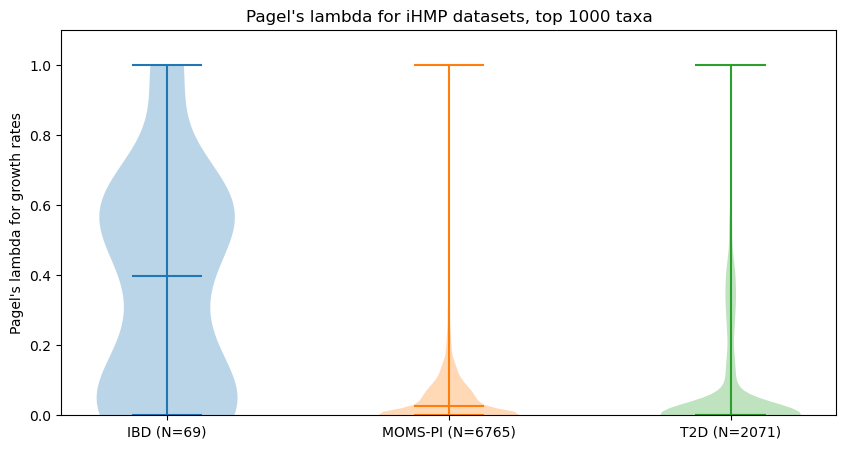

In [27]:
# Violin plot
import matplotlib.pyplot as plt
import pandas as pd

data = []
for name in names:
    pls = pd.read_table(f"./results/{name}_pls_top{TOP_N}.tsv")
    pls["dataset"] = name.upper()
    data.append(pls)

pls = pd.concat(data)

# Plot
plt.figure(figsize=(10, 5))
datasets = pls["dataset"].unique()
for i, dataset in enumerate(data):
    plt.violinplot(
        dataset["lambda"].dropna().values,
        showmedians=True,
        positions=[i + 1],
    )

# print(len(ibd_pls["lambda"].dropna().values)) # 69
# print(len(moms_pls["lambda"].dropna().values)) # 6765
# print(len(t2d_pls["lambda"].dropna().values)) # 2071

plt.xticks(range(1, 4), ["IBD (N=69)", "MOMS-PI (N=6765)", "T2D (N=2071)"])
plt.ylabel("Pagel's lambda for growth rates")
plt.title(f"Pagel's lambda for iHMP datasets, top {TOP_N} taxa")
plt.ylim(0, 1.1)
plt.savefig(f"./results/pls_top{TOP_N}.png", dpi=300)
plt.show()

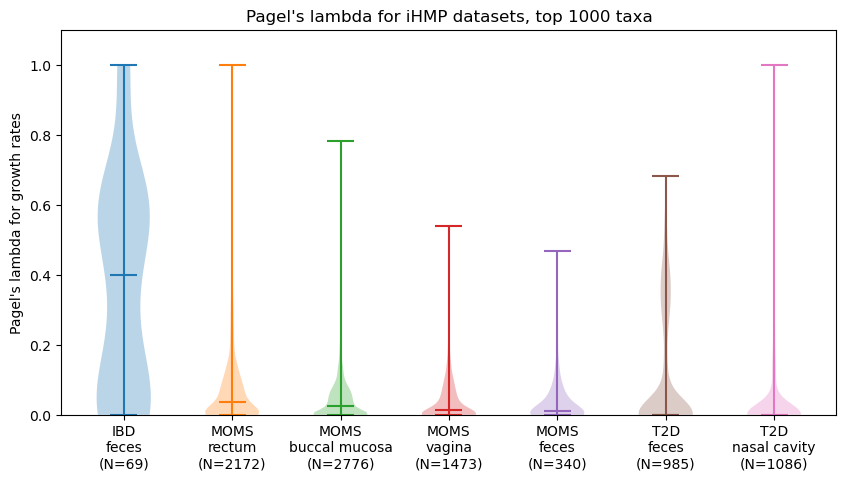

In [28]:
# Same thing but grouped by body site

# Only need the plotting part, though:
plt.figure(figsize=(10, 5))
datasets = pls["dataset"].unique()
labels = []
position = 1
for dataset in data:
    for site in dataset["site"].unique():
        name = dataset["dataset"].unique()[0]
        lambdas = dataset[dataset["site"] == site]["lambda"].dropna().values
        if len(lambdas) > 4: # Drop uselessly small samples
            labels.append(f"{name}\n{site}\n(N={len(lambdas)})")
            plt.violinplot(lambdas, showmedians=True, positions=[position])
            position += 1

plt.xticks(range(1, position), labels)
plt.ylabel("Pagel's lambda for growth rates")
plt.title(f"Pagel's lambda for iHMP datasets, top {TOP_N} taxa")
plt.ylim(0, 1.1)
plt.savefig(f"./results/lambda_by_site_top{TOP_N}.png", dpi=300)
plt.show()

In [27]:
# New experiment: effect of top_N on lambda values, violin plot, IBD only

topn_vals = [10, 20, 50, 100, 200, 500, 1000, None]

for top_n in topn_vals:
    # We already did 100 and 1000, so we skip them for now
    if os.path.exists(f"./results/ibd_pls_top{top_n}.tsv"):
        continue
    
    print(f"top_n={top_n}")
    diffs_ibd = get_diffs("ibd", top_n=top_n)
    pls, tree = pagels_dataframe(diffs_ibd, GG_TREE)
    pls.to_csv(f"./results/ibd_pls_top{top_n}.tsv", sep="\t")
    tree.write(format=1, outfile=f"./results/ibd_tree_top{top_n}.nwk")

top_n=None


100%|██████████| 69/69 [25:33<00:00, 22.22s/it]


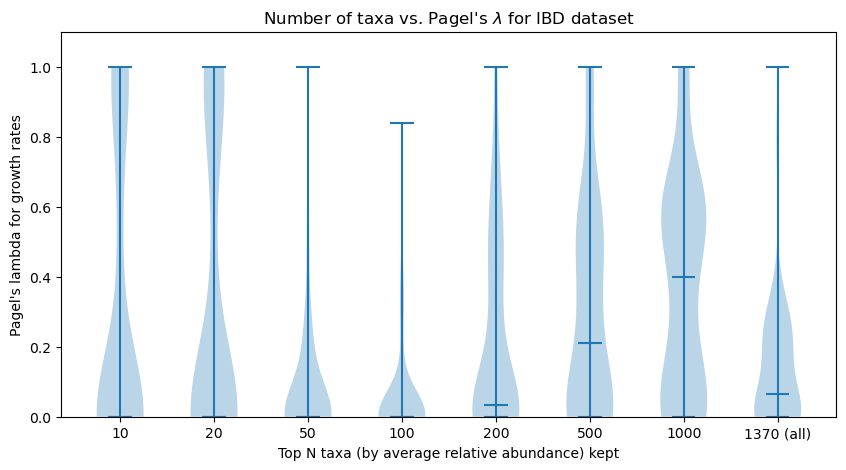

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = []
for top_n in topn_vals:
    pls = pd.read_table(f"./results/ibd_pls_top{top_n}.tsv")
    pls["top_n"] = top_n
    data.append(pls)

pls = pd.concat(data)

# Plot
plt.figure(figsize=(10, 5))
# for i, top_n in enumerate(pls["top_n"].unique()):
plt.violinplot(
    [x["lambda"].values for x in data],
    showmedians=True,
    # positions=[i + 1],
)

plt.xticks(range(1, len(topn_vals) + 1), topn_vals[:-1] + ["1370 (all)"])
plt.xlabel("Top N taxa (by average relative abundance) kept")
plt.ylabel("Pagel's lambda for growth rates")
plt.title(f"Number of taxa vs. Pagel's $\lambda$ for IBD dataset")
plt.ylim(0, 1.1)
plt.savefig(f"./results/pls_top_n.png", dpi=300)
plt.show()

In [31]:
get_diffs("ibd")

1000269    1008348  1009894  1012376    1017181  \
site  patient visit                                                      
feces 3002    6     -10.298141 -10.991272      0.0      0.0 -11.684410   
              8       0.000000   0.000000      0.0      0.0   0.000000   
              9       0.000000   0.000000      0.0      0.0   0.000000   
      3003    5       0.000000   0.000000      0.0      0.0   0.000000   
              6       0.000000   0.000000      0.0      0.0   0.000000   
...                        ...        ...      ...      ...        ...   
      2021    11      0.000000   0.000000      0.0      0.0   0.000000   
      2026    4      14.297867   0.000000      0.0      0.0  12.166245   
      2027    4       0.000000   0.000000      0.0      0.0   0.000000   
      2014    9      12.657319   0.000000      0.0      0.0  12.028713   
              11    -12.657319   0.000000      0.0      0.0 -12.028713   

                       1017413  1019823    1019878     102222  1023075  ...  \
site  patient visit                                                     ...   
feces 3002    6      11.704510      0.0   0.307779   0.000000      0.0  ...   
              8     -11.704510      0.0 -11.704510   0.000000      0.0  ...   
              9      10.833370      0.0   0.000000   0.000000      0.0  ...   
      3003    5       0.000000      0.0   0.000000   0.000000      0.0  ...   
              6       0.000000      0.0   0.000000   0.000000      0.0  ...   
...                        ...      ...        ...        ...      ...  ...   
      2021    11      0.000000      0.0  12.022099  10.769351      0.0  ...   
      2026    4      -1.047907      0.0   2.164063   0.000000      0.0  ...   
      2027    4       0.000000      0.0   0.000000   0.000000      0.0  ...   
      2014    9      12.251855      0.0  16.780140   0.000000      0.0  ...   
              11    -12.251855      0.0  -0.695318   0.000000      0.0  ...   

                     964363     968675     968954     971907     975306  \
site  patient visit                                                       
feces 3002    6         0.0  -0.028690  -2.331253 -12.244023  -1.152620   
              8         0.0 -13.313941 -10.605914   0.000000 -14.557134   
              9         0.0  12.219649  11.526507  10.833370  14.704551   
      3003    5         0.0   0.000000   0.000000   0.000000   0.000000   
              6         0.0  11.768101   0.000000   0.000000   0.000000   
...                     ...        ...        ...        ...        ...   
      2021    11        0.0  12.641135  11.867949  11.462488  16.378802   
      2026    4         0.0   0.149108   3.646864  -0.065440   2.008442   
      2027    4         0.0   0.000000   0.000000   0.000000   0.000000   
      2014    9         0.0  -0.681282  14.280000  -1.258531  17.752292   
              11        0.0  -3.892622   0.418529 -16.915290  -4.152376   

                        976470     979707     988375     988932     999046  
site  patient visit                                                         
feces 3002    6     -11.396731   0.000000 -14.059309   1.224061 -10.298141  
              8       0.000000   0.000000   0.000000 -12.215332   0.000000  
              9       0.000000   0.000000   0.000000  11.526507   0.000000  
      3003    5       0.000000   0.000000   0.000000   0.000000   0.000000  
              6       0.000000   0.000000  15.026190  11.768101   0.000000  
...                        ...        ...        ...        ...        ...  
      2021    11     11.462488   0.000000  16.466424  10.769351   0.000000  
      2026    4      -2.242312   0.000000   0.000000   1.431295   0.610305  
      2027    4       0.000000   0.000000   0.000000   0.000000   0.000000  
      2014    9      -3.290081   0.000000   0.000000  12.434176   9.949313  
              11      1.807218  13.599917   0.000000 -12.434176  -9.949313  

[69 rows x 1370 columns]

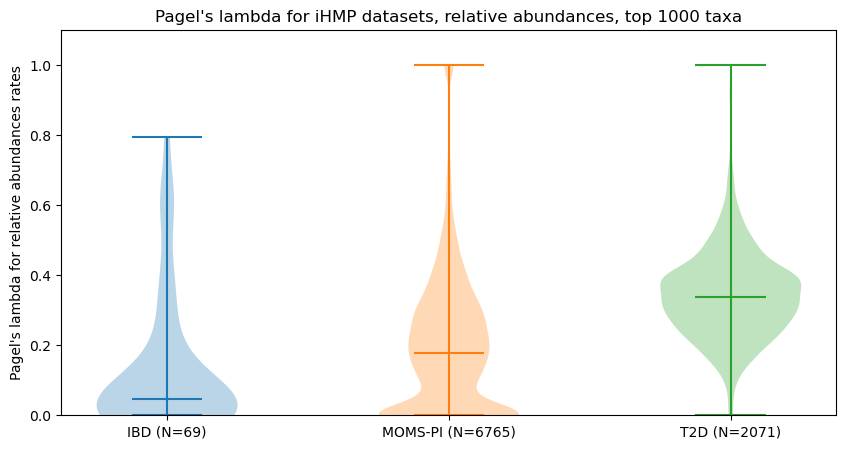

In [40]:
# abuns = {name: get_diffs(name, top_n=TOP_N, get_abundances=True) for name in names}

# # Compute lambda values for each iHMP dataset:
# for name in names:
#     pls, tree = pagels_dataframe(abuns[name], GG_TREE)
#     pls.to_csv(f"./results/{name}_abun_pls_top{TOP_N}.tsv", sep="\t")
#     tree.write(format=1, outfile=f"./results/{name}_abun_tree_top{TOP_N}.nwk")

# # Violin plot
# # Violin plot
# import matplotlib.pyplot as plt
# import pandas as pd

# data = []
# for name in names:
#     pls = pd.read_table(f"./results/{name}_abun_pls_top{TOP_N}.tsv")
#     pls["dataset"] = name.upper()
#     data.append(pls)

# pls = pd.concat(data)

# Plot
plt.figure(figsize=(10, 5))
datasets = pls["dataset"].unique()
for i, dataset in enumerate(data):
    plt.violinplot(
        dataset["lambda"].dropna().values,
        showmedians=True,
        positions=[i + 1],
    )

# print(len(ibd_pls["lambda"].dropna().values)) # 69
# print(len(moms_pls["lambda"].dropna().values)) # 6765
# print(len(t2d_pls["lambda"].dropna().values)) # 2071

plt.xticks(range(1, 4), ["IBD (N=69)", "MOMS-PI (N=6765)", "T2D (N=2071)"])
plt.ylabel("Pagel's lambda for relative abundances rates")
plt.title(f"Pagel's lambda for iHMP datasets, relative abundances, top {TOP_N} taxa")
plt.ylim(0, 1.1)
plt.savefig(f"./results/pls_top{TOP_N}.png", dpi=300)
plt.show()